## **Assigment 3**

Nama : Alfendo Rizky Syachputra

Kode : PYTN-KS10-024

### Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### 1 . Data Understanding

In [237]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


In [238]:
# import dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [239]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [240]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [241]:
# melihat jumlah baris dan kolom pada dataset
df.shape

(41188, 21)

Dataset yang digunakan terdapat 21 kolom dan 41188 baris

### 2 . Data Preparation

In [242]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [243]:
# melakukan rename pada kolom y menjadi status, untuk mengetahui klien sudah berlangganan deposito atau belum
df.rename(columns = {'y':'status'}, inplace = True)

In [244]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,status
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [245]:
# descriptive statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Terlihat pada descriptive statistics bahwa rata - rata age yaitu 40 dengan age min 17 dan age max 98

In [246]:
# melihat jumlah di setiap job
df['job'].value_counts().to_frame()

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


job admin sangat mendominasi dibandingkan dengan job lainnya dan terdapat 330 data yang tidak diketahui

In [247]:
# melihat jumlah status pada kolom marital
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

hasil menunjukkan bahwa client tebanyak rata - rata sudah merried, dan terdapat 80 status yang tidak diketahui

In [248]:
# melihat missing value
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
status            0
dtype: int64

setelah dilakukan checking missing value tenyata tidak ditemukan nilai yang missing, maka dari itu dilakukan proses handling

### 3 . Exploratory Data Visualization (EDA)

In [249]:
df['status'].value_counts()

no     36548
yes     4640
Name: status, dtype: int64

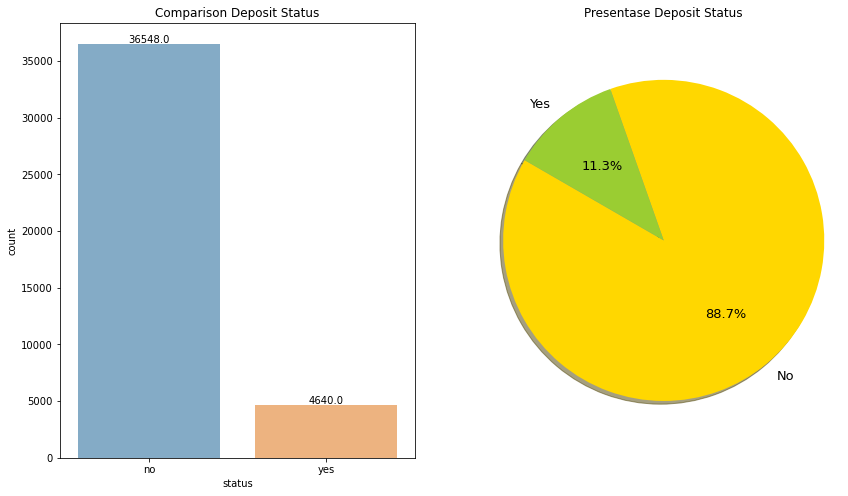

In [250]:
# membuat bar chart untuk melihat presentase client antara yang belangganan deposito dengan yang tidak
df['status'].value_counts().plot(kind="barh", figsize=(14,8))
plt.subplot(121)
plt.title("Comparison Deposit Status")
ax = sns.countplot(x='status', data=df, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,4), textcoords='offset points')

# membuat pie chart untuk melihat presentase client yang berlangganan deposito dengan yang tidak
plt.subplot(122)
plt.title("Presentase Deposit Status")
status_values_count = df['status'].value_counts()
status_size = status_values_count.values.tolist()
status_labels = 'No', 'Yes'
colors=['gold','yellowgreen']
pcs, texts, autotexts = plt.pie(status_size, labels=status_labels, colors=colors,
                             autopct='%1.1f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

**Conclusion**

Dari hasil visualisasi diatas bisa disimpulkan bahwa status **no** lebih banyak dibandingkan **yes**, maka dari itu banyak pengguna(client) yang belum berlangganan.

In [251]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,status
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


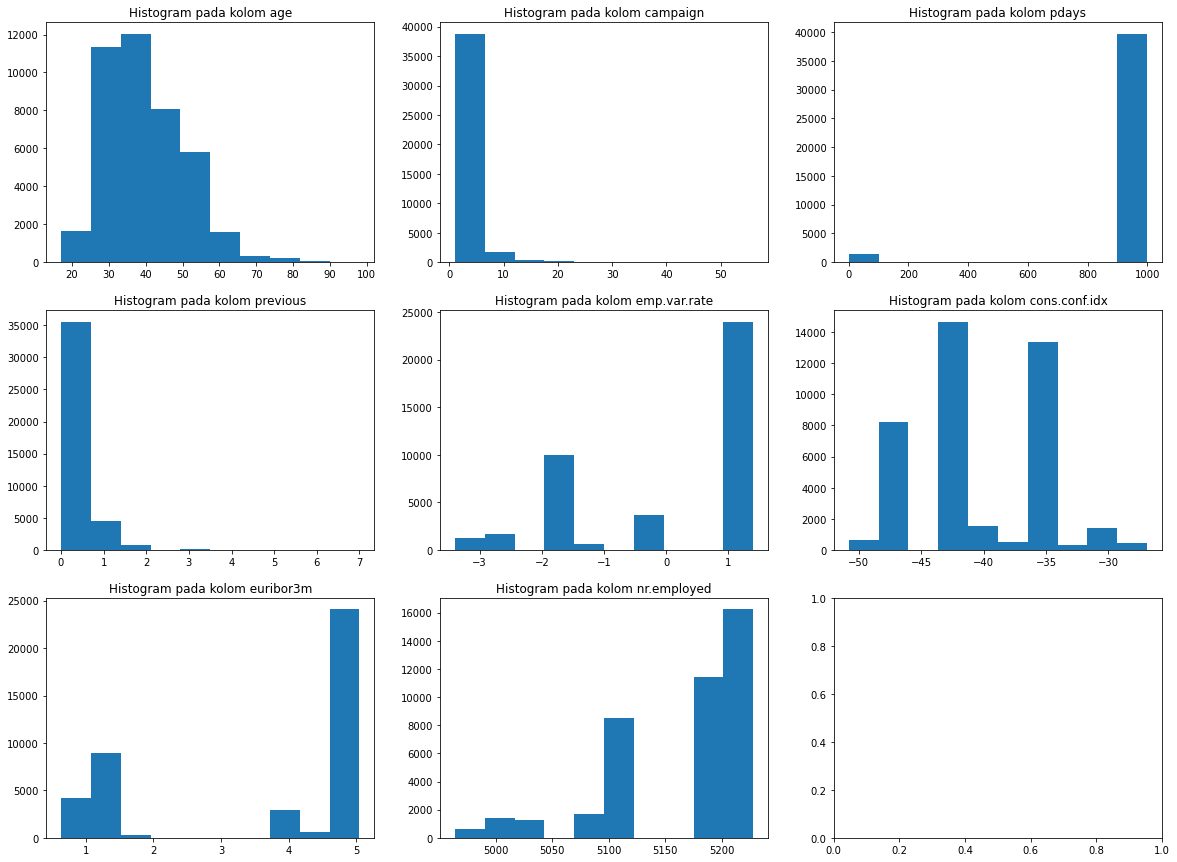

In [252]:
# eksplore pada kolom tipe mumerik
nums = ['age','campaign','pdays','previous','emp.var.rate',
        'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in nums:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"Histogram pada kolom {num_col}")
    count+=1
plt.show()

**Conclusion**

Dari hasil visualisasi diatas saya akan menyimpulkan satu kolom yaitu **age**, hasil menunjukkan bahwa pengguna dengan usia **40** tahun lebih banyak dibandingkan usia **90** tahun yang nilai nya lebih rendah.

### 4 . Preprocessing

In [253]:
# proses encoding
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])
df['status'] = LabelEncoder().fit_transform(df['status'])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,status
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [254]:
# memastikkan data sudah menjadi tipe numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [255]:
# memilih feature
X = df.drop('status', axis=1)

In [256]:
# memilih target
y = df['status']

In [257]:
# spliting data training 80% dan data testing 20%
X_train, X_test, y_train, y_test = train_test_split(X , y, shuffle = True, test_size = 0.2, random_state = 42)

# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

# Transformasi data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('hasil feature data train =', X_train.shape)
print('hasil target data train =', y_train.shape)
print('hasil feature data test =', X_test.shape)
print('hasil target data test =', y_test.shape)

hasil feature data train = (32950, 20)
hasil target data train = (32950,)
hasil feature data test = (8238, 20)
hasil target data test = (8238,)


**Conclusion**

Pada proses ini dilakukan encoding pada data tipe kategorik dan melakukan spliting data, data training 80% dan data testing 20%. Dengan output **Data Training** 32950 dan **Data Testing** 8238.

### 5 . Modeling

Modeling yang digunakan pada Assigment yaitu

* Logistic Regression
* K - Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* Naive Bayes

**A . Logistic Regression**

In [258]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [259]:
y_pred = model_log.predict(X_test)

In [260]:
# melihat accuracy score pada dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Nilai Accuracy :',accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
print('Hasil Confusion Matrix\n', matrix)

Nilai Accuracy : 0.9104151493080845
Hasil Confusion Matrix
 [[7115  188]
 [ 550  385]]


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



<AxesSubplot:>

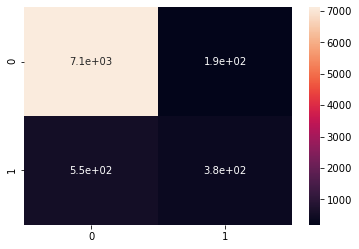

In [262]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [263]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative = {tn}')
print(f'False Positive = {fp}')
print(f'False Negative = {fn}')
print(f'True Positive = {tn}')

True Negative = 7115
False Positive = 188
False Negative = 550
True Positive = 7115


**Conclusion**

Berdasarkan hasil dari implementation Logistic Regression diatas, nilai accuracy adalah **91%** (0.9104151493080845). Maka dari itu hasil ini bisa dikatakan cukup baik.

**B . K - Nearest Neighbors (KNN)**

In [264]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [265]:
y_pred1 = model_knn.predict(X_test)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [266]:
print('Nilai Accuracy :', accuracy_score(y_test, y_pred1))
matrix = confusion_matrix(y_test, y_pred1)
print('Hasil Confusion Martrix\n', matrix)

Nilai Accuracy : 0.902282107307599
Hasil Confusion Martrix
 [[6986  317]
 [ 488  447]]


In [267]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7303
           1       0.59      0.48      0.53       935

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



<AxesSubplot:>

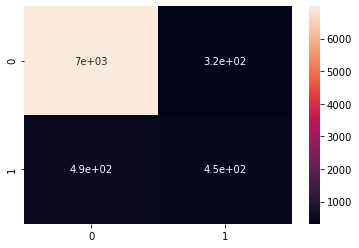

In [268]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)

In [269]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 6986
False Positive : 317
False Positive : 488
True Positive : 447


**Conclusion**

Berdasarkan hasil dari implementation K-Nearest Neighbors (KNN) diatas, nilai accuracy adalah **90.2%** (0.902282107307599). Maka dari itu hasil ini bisa dikatakan cukup baik.

**C . Support Vector Machine (SVM)**

In [270]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [271]:
y_pred2 = model_svm.predict(X_test)

In [272]:
print('Nilai Accuracy :', accuracy_score(y_test, y_pred2))
matrix = confusion_matrix(y_test, y_pred2)
print('Hasil Confusion Matrix \n', matrix)

Nilai Accuracy : 0.8945132313668366
Hasil Confusion Matrix 
 [[7176  127]
 [ 742  193]]


In [273]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238



<AxesSubplot:>

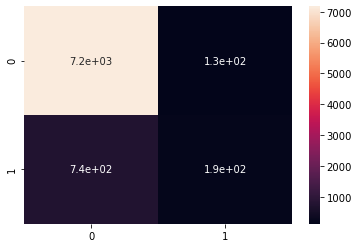

In [274]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

In [275]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 7176
False Positive : 127
False Positive : 742
True Positive : 193


**Conclusion**

Berdasarkan hasil dari implementation K-Nearest Neighbors (KNN) diatas, nilai accuracy adalah **89.4%** (0.8945132313668366). Maka dari itu hasil ini bisa dikatakan baik.

**D . Decision Tree**

In [276]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [277]:
y_pred3 = model_dt.predict(X_test)

In [278]:
print('Nilai Accuracy :', accuracy_score(y_test, y_pred3))
matrix = confusion_matrix(y_test, y_pred3)
print('Hasil Confusion Matrix \n', matrix)

Nilai Accuracy : 0.8903860160233066
Hasil Confusion Matrix 
 [[6850  453]
 [ 450  485]]


In [279]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.52      0.52      0.52       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



<AxesSubplot:>

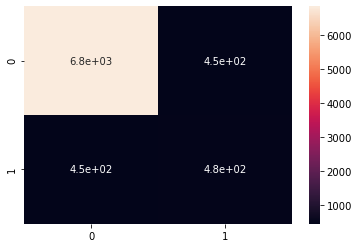

In [280]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)

In [281]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 6850
False Positive : 453
False Positive : 450
True Positive : 485


**Conclusion**

Berdasarkan hasil dari implementation K-Nearest Neighbors (KNN) diatas, nilai accuracy adalah **88.7%** (0.887836853605244). Maka dari itu hasil ini bisa dikatakan baik.

**E . Random Forest**

In [282]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [283]:
y_pred4 = model_rf.predict(X_test)

In [284]:
print('Nilai Accuracy :', accuracy_score(y_test, y_pred4))
matrix = confusion_matrix(y_test, y_pred4)
print('Hasil Confusion Matrix \n', matrix)

Nilai Accuracy : 0.9128429230395727
Hasil Confusion Matrix 
 [[7034  269]
 [ 449  486]]


In [285]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



<AxesSubplot:>

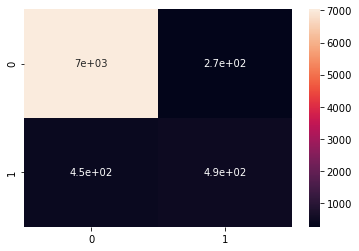

In [286]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True)

In [287]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 7034
False Positive : 269
False Positive : 449
True Positive : 486


**Conclusion**

Berdasarkan hasil dari implementation K-Nearest Neighbors (KNN) diatas, nilai accuracy adalah **91.2%** (0.9128429230395727). Maka dari itu hasil ini bisa dikatakan cukup baik.

**F . Naive Bayes**

In [288]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [289]:
y_pred5 = model_nb.predict(X_test)

In [290]:
print('Nilai Accuracy :', accuracy_score(y_test, y_pred5))
matrix = confusion_matrix(y_test, y_pred5)
print('Hasil Confusion Matrix \n', matrix)

Nilai Accuracy : 0.8505705268268997
Hasil Confusion Matrix 
 [[6432  871]
 [ 360  575]]


In [291]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7303
           1       0.40      0.61      0.48       935

    accuracy                           0.85      8238
   macro avg       0.67      0.75      0.70      8238
weighted avg       0.88      0.85      0.86      8238



<AxesSubplot:>

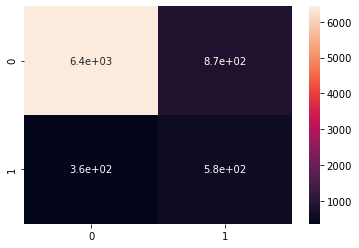

In [292]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)

In [293]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative : {tn}')
print(f'False Positive : {fp}')
print(f'False Positive : {fn}')
print(f'True Positive : {tp}')

True Negative : 6432
False Positive : 871
False Positive : 360
True Positive : 575


**Conclusion**

Berdasarkan hasil dari implementation K-Nearest Neighbors (KNN) diatas, nilai accuracy adalah **85%** (0.8505705268268997). Maka dari itu hasil ini bisa dikatakan baik.

**G . Overall Analysis (Algorithm Analysis)**

In [295]:
# perbandingan hasil akurasi dari semua model
print("--- Hasil Accuracy dari Semua Model ---\n")

print("A . Logistic Regression :", accuracy_score(y_test, y_pred))
print("B . K-Nearest Neighbors (KNN) :", accuracy_score(y_test, y_pred1))
print("C . Support Vector Machine (SVM) :", accuracy_score(y_test, y_pred2))
print("D . Decision Tree :", accuracy_score(y_test, y_pred3))
print("F . Random Forest :", accuracy_score(y_test, y_pred4))
print("G . Naive Bayes :", accuracy_score(y_test, y_pred5))

--- Hasil Accuracy dari Semua Model ---

A . Logistic Regression : 0.9104151493080845
B . K-Nearest Neighbors (KNN) : 0.902282107307599
C . Support Vector Machine (SVM) : 0.8945132313668366
D . Decision Tree : 0.8903860160233066
F . Random Forest : 0.9128429230395727
G . Naive Bayes : 0.8505705268268997


Berdasarkan hasil perbandingan diatas bisa disimpulkan bahwa algoritma **Random Forest** mempunyai accuracy yang tinggi yaitu **91.2%**, maka dari itu penggunaan **Random Forest** sangat tepat saya gunakan untuk memprediksi pengguna(client) akan berlangganan deposito atau tidak (yes/no).